### Instalamos las librerías necesarias para poder hacer Auto Arima y descargar los datos

In [0]:
'''
Debido a los problemas con la versión de algún kernel de colab al importar statmodels 
falla y se debe actualizar el kernel y reiniciar el entorno de ejecución. #descomentar si algún import da problemas.
'''
#!pip install ipykernel --upgrade
#import IPython
#app = IPython.Application.instance()
#app.kernel.do_shutdown(True) 

'\nDebido a los problemas con la versión de algún kernel de colab al importar statmodels \nfalla y se debe actualizar el kernel y reiniciar el entorno de ejecución. #descomentar si algún import da problemas.\n'

In [0]:
! pip install pytest
! pip install pmdarima

    100% |████████████████████████████████| 686kB 21.5MB/s 
    100% |████████████████████████████████| 7.4MB 6.5MB/s 
  Found existing installation: statsmodels 0.8.0
    Uninstalling statsmodels-0.8.0:
      Successfully uninstalled statsmodels-0.8.0


In [0]:
!pip install alpha_vantage 

  Stored in directory: /root/.cache/pip/wheels/21/9c/02/b7cfae63f7119f4089f229ba1a09ce90fabbaf96199c2890be
Successfully built alpha-vantage


In [0]:
! pip install pydlm

    100% |████████████████████████████████| 51kB 2.0MB/s 
  Stored in directory: /root/.cache/pip/wheels/69/d3/ca/f5a7bc0976a2779bf87c20f82a9adece40616ee3b9d39bf410
Successfully built pydlm


In [0]:
!pip install pycwt

### Configuración del API de descarga

In [0]:
import os
os.environ['ALPHAVANTAGE_API_KEY']= 'I76UKDQRO1MKHWZY' # Establece la API key obtenida para realizar las consulltas

#### Test de la librería

In [0]:
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(output_format='pandas')
# Get json object with the intraday data and another with  the call's metadata
data, meta_data = ts.get_intraday('GOOGL')
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2019-02-22 10:45:00,1109.6000,1110.5000,1108.340,1110.4600,42193.0
2019-02-22 11:00:00,1110.9500,1112.1801,1110.200,1112.1300,48640.0
2019-02-22 11:15:00,1112.2800,1114.2300,1111.955,1114.2300,31219.0
2019-02-22 11:30:00,1114.4449,1115.5800,1113.970,1115.0800,38885.0
2019-02-22 11:45:00,1115.5100,1115.6500,1114.140,1114.6801,25028.0


#### Hemos elegido trabajar con la conversión *EUR-USD*

In [0]:
from alpha_vantage.foreignexchange import ForeignExchange
from pprint import pprint
cc = ForeignExchange(output_format='pandas')
# There is no metadata in this call
data,_ = cc.get_currency_exchange_daily(from_symbol='EUR',to_symbol='USD',outputsize="full")
data.tail()

,1. open,2. high,3. low,4. close
date,,,,
2019-02-24,1.1331,1.1348,1.1324,1.1336
2019-02-25,1.1336,1.1368,1.1333,1.1359
2019-02-26,1.1359,1.1403,1.1344,1.1393
2019-02-27,1.1393,1.1404,1.1361,1.1372
2019-02-28,1.1381,1.1395,1.1361,1.1395


In [0]:
#Convertimos el indice en tipo fecha
import datetime as dt
import pandas as pd

data.index = pd.to_datetime(data.index)

In [0]:
data.head()

,1. open,2. high,3. low,4. close
date,,,,
2000-11-24,0.8368,0.8455,0.8368,0.8380
2000-11-27,0.8391,0.8525,0.8379,0.8513
2000-11-28,0.8516,0.8579,0.8500,0.8558
2000-11-29,0.8563,0.8658,0.8547,0.8575
2000-11-30,0.8576,0.8736,0.8560,0.8716


In [0]:
data.shape

(5000, 4)

In [0]:
data.dtypes

1. open     float64
2. high     float64
3. low      float64
4. close    float64
dtype: object

In [0]:
data.index

DatetimeIndex(['2000-11-24', '2000-11-27', '2000-11-28', '2000-11-29',
               '2000-11-30', '2000-12-01', '2000-12-04', '2000-12-05',
               '2000-12-06', '2000-12-07',
               ...
               '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21',
               '2019-02-22', '2019-02-24', '2019-02-25', '2019-02-26',
               '2019-02-27', '2019-02-28'],
              dtype='datetime64[ns]', name='date', length=5000, freq=None)

# Análisis Exploratorio de los Datos (EDA)

En este apartado daremos algunos estádisticos relevantes de los datos acompañado con algún gráfico


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np




import seaborn as sns
sns.set()

In [0]:
data.describe()

,1. open,2. high,3. low,4. close
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.223130,1.228552,1.217668,1.223176
std,0.157877,0.158591,0.157116,0.157791
min,0.836500,0.845500,0.834700,0.836200
25%,1.122875,1.128400,1.118700,1.122925
50%,1.233600,1.239000,1.228450,1.234050
75%,1.335725,1.340625,1.329000,1.335825
max,1.599600,1.603500,1.586600,1.599600


Dibujamos las 4 variables de los datos para ver que pinta tiene

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f90c8e737f0>,
      dtype=object)

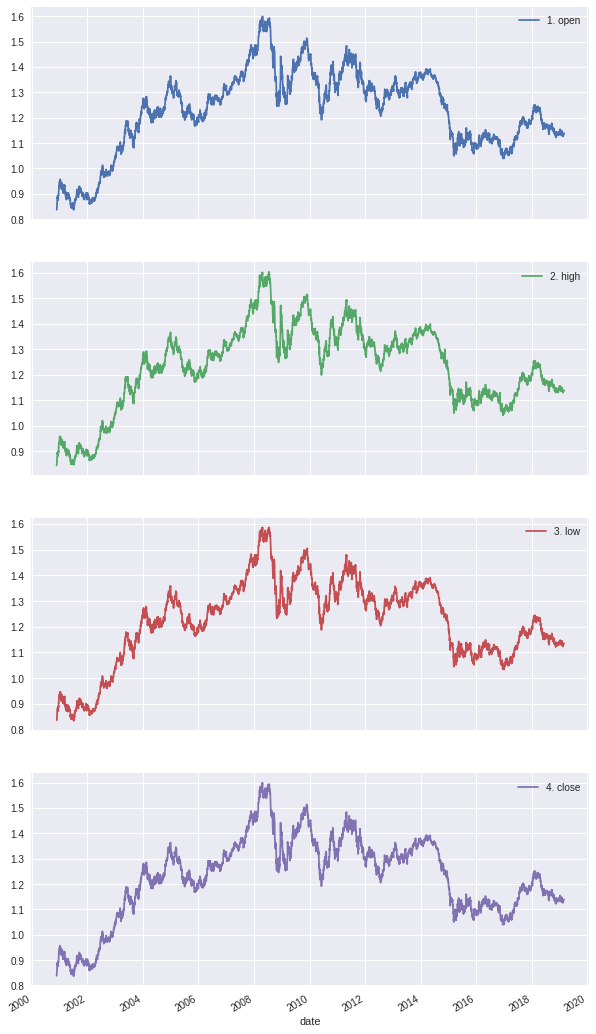

In [0]:


data.plot(subplots=True, sharey = False, figsize = (10,20) )


También aplicamos al eje Y un logartimo para ver si obtenemos alguna información extra

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f90c8deacf8>,
      dtype=object)

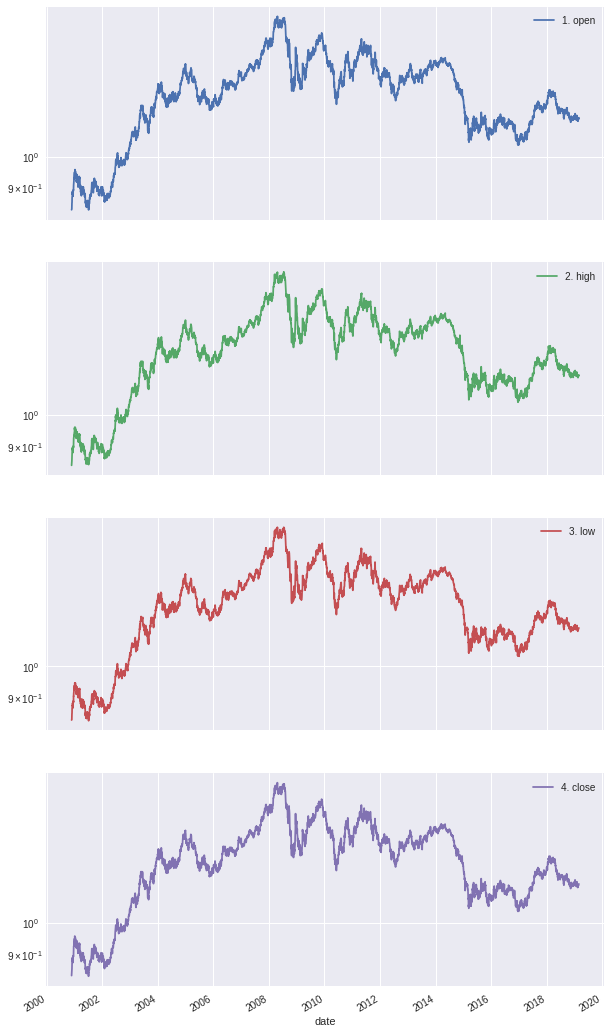

In [0]:
data.plot(subplots=True, sharey = False, logy=True, figsize = (10,20))

Como era de experar en el boxplot las 4 variables tiene comportamientos similares y no se observan anomalías (outlayers)

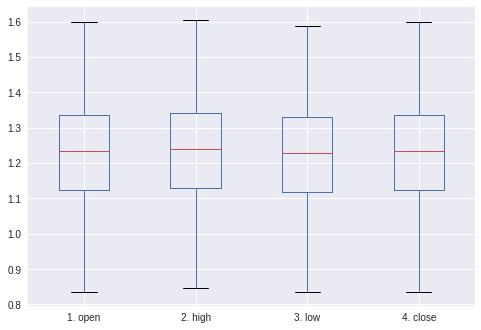

In [0]:
data.plot(kind= 'box')

Creamos una copia de los datos para poder manipularlos sin estropear el origen.

También hemos creado una variable de "año" para poder ver las variaciones inter anuales

In [0]:
data_2 = data.copy()

In [0]:
data_2['Year'] = data_2.index.year

In [0]:
data_2.head()

,1. open,2. high,3. low,4. close,Year
date,,,,,
2000-11-24,0.8368,0.8455,0.8368,0.8380,2000
2000-11-27,0.8391,0.8525,0.8379,0.8513,2000
2000-11-28,0.8516,0.8579,0.8500,0.8558,2000
2000-11-29,0.8563,0.8658,0.8547,0.8575,2000
2000-11-30,0.8576,0.8736,0.8560,0.8716,2000


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


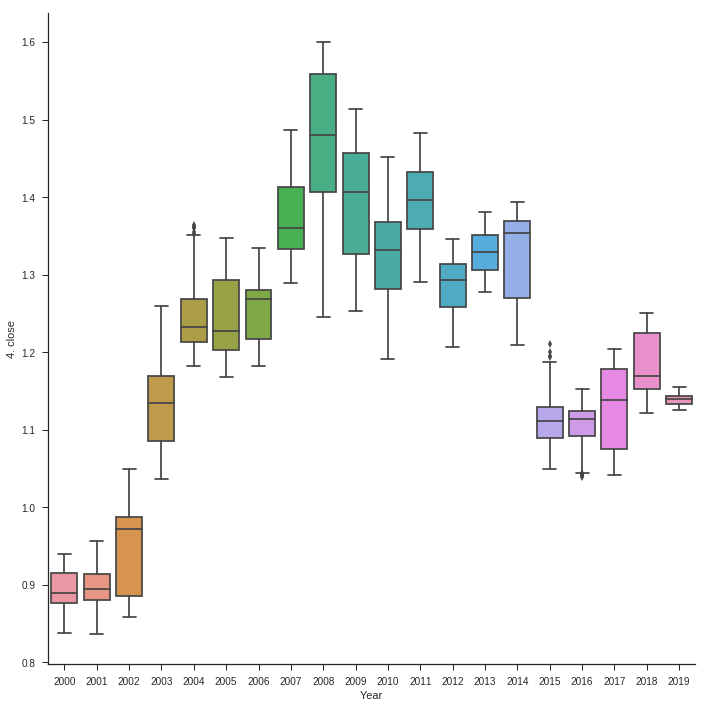

In [0]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("Year","4. close",  data=data_2, kind="box", size=10, aspect=1)
    g.set_axis_labels("Year", "4. close")

En el gráfico anterior se ve claramente la primera fase de la Crisis y como el USD se debilitó frente al EUR

Se ha decidido modelizar el precio de cierre. 

En siguientes apartados veremos varios métodos de modelización.

## Análisis en frecuencia

En primer lugar se calcula el espectrograma completo de la señal con una ventana temporal completa. 

/usr/local/lib/python3.6/dist-packages/matplotlib/mlab.py:1246: UserWarning: Only one segment is calculated since parameter NFFT (=8192) >= signal length (=6574).
  "(=%d) >= signal length (=%d)." % (NFFT, len(x)))


Text(0, 0.5, 'Frequencia (Hz)')

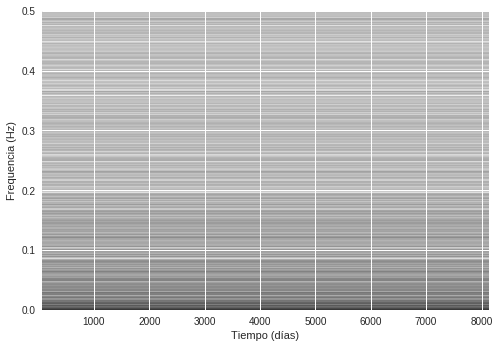

In [0]:
# Solo analizamos años completos:
data_2 = data.copy()
data_2['Year'] = data_2.index.year
data_anuales=data_2['2001':'2018']['4. close'].asfreq('d', method='pad')

from scipy import signal

#fecuencia de muestreo:
samplingFrequency= 1 #frecuencia en días, se puede cambiar a meses (30) o años (365) con resultados similares


# pintar el espectrograma
plt.subplot(111)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(signal.detrend(data_anuales)
                                                               ,NFFT=8192, Fs=samplingFrequency) 
# a fin de obtener mejor definición en frecuencia elegimos una ventana que abarca todas las muestras y rellena con ceros los datos vacios

plt.xlabel('Tiempo (días)')
plt.ylabel('Frequencia (Hz)')

Se observa que la señal no presenta frecuencias predominantes claras, los datos pueden haber sido pre tratados/ filtrados. Si se analiza en ventanas más pequeñas se observa grandes variaciones en el espectro de frecuencia entre distintos marcos temporales y potencias muy bajas (representadas en gris/negro). Se prueba a realizar un análisis wavelet para comprobar si a distintas resoluciones de escala tiempo/frecuencia somos capaces de identificar algún patrón.

In [0]:
from __future__ import division
from matplotlib import pyplot

import pycwt as wavelet
from pycwt.helpers import find


In [0]:
#reducir el tiempo de análisis
data_anuales=data_2['2015':'2018']['4. close'].asfreq('d', method='pad')

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


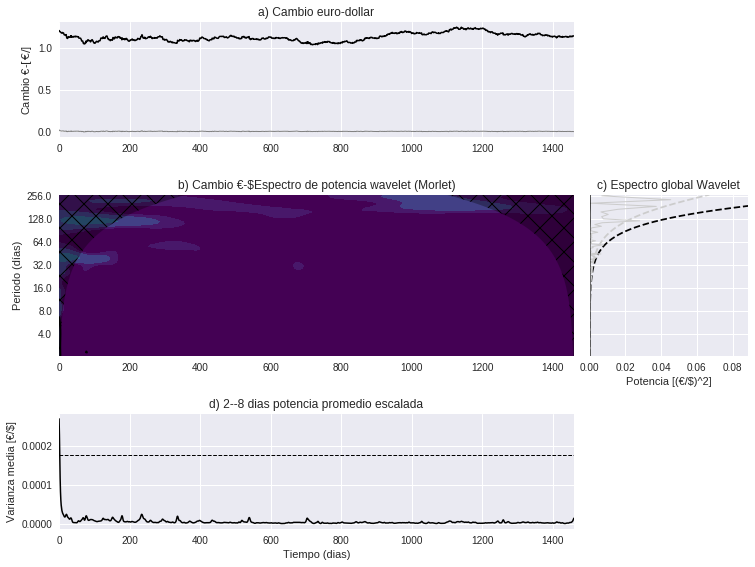

In [0]:
#Etiquetas y parámetros del dataset
title = 'Cambio euro-dollar'
label = 'Cambio €-$'
units = '€/$'
N=len(data_anuales)
dt = 1 # diferencia diaria
t = np.arange(0, len(data_anuales))*dt

# diferenciacion de los datos y normalización
p = np.polyfit(t, data_anuales, 1)
data_untrend = data_anuales - np.polyval(p, t)
std_data = data_untrend.std()  
var_data = std_data ** 2  
data_norm = data_untrend / std_data 

mother = wavelet.Morlet(6)
s0 = 2 * dt  #Escalado inicial
dj = 1 / 12  # 12 suboctavas por octava
J = 7 / dj  # 7 potencias de 2 sobre dj sub-octavas
alpha=0.98 # ver ARIMA
wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(data_norm, dt, dj, s0, J,
                                                      mother)
iwave = wavelet.icwt(wave, scales, dt, dj, mother) * std_data
power = (np.abs(wave)) ** 2
fft_power = np.abs(fft) ** 2
period = 1 / freqs
power /= scales[:, None]
signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)
sig95 = np.ones([1, N]) * signif[:, None]
sig95 = power / sig95
glbl_power = power.mean(axis=1)
dof = N - scales  
glbl_signif, tmp = wavelet.significance(var_data, dt, scales, 1, alpha,
                                        significance_level=0.95, dof=dof,
                                        wavelet=mother)
#print(period)
sel = find((period >= 2) & (period < 31))
Cdelta = mother.cdelta
scale_avg = (scales * np.ones((N, 1))).transpose()
scale_avg = power / scale_avg  # Escalado de la potencia según Torrence and Compo (1998) 
scale_avg = var_data * dj * dt / Cdelta * scale_avg[sel, :].sum(axis=0)
scale_avg_signif, tmp = wavelet.significance(var_data, dt, scales, 2, alpha,
                                             significance_level=0.95,
                                             dof=[scales[sel[0]],
                                                  scales[sel[-1]]],
                                             wavelet=mother)
# Pintamos los resultados
# Crear la figura
pyplot.close('all')
pyplot.ioff()
figprops = dict(figsize=(11, 8), dpi=72)
fig = pyplot.figure(**figprops)
'''
Anomalías de la serie de tiempo original y la transformación de wavelet inversa.
'''
ax = pyplot.axes([0.1, 0.75, 0.65, 0.2])
ax.plot(t, iwave, '-', linewidth=1, color=[0.5, 0.5, 0.5])
ax.plot(t, data_anuales, 'k', linewidth=1.5)
ax.set_title('a) {}'.format(title))
ax.set_ylabel(r'{} [{}]'.format(label, units))
'''
En la segunda gráfica se muestra el espectro de potencia de wavelet normalizado 
y el nivel de significación de las líneas de contorno y el cono del área sombreada 
por influencia. Tenga en cuenta que la escala del período es logarítmica.
'''
bx = pyplot.axes([0.1, 0.37, 0.65, 0.28], sharex=ax)
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
bx.contourf(t, np.log2(period), np.log2(power), np.log2(levels),
            extend='both', cmap=pyplot.cm.viridis)
extent = [t.min(), t.max(), 0, max(period)]
bx.contour(t, np.log2(period), sig95, [-99, 1], colors='k', linewidths=2,
           extent=extent)
bx.fill(np.concatenate([t, t[-1:] + dt, t[-1:] + dt,
                           t[:1] - dt, t[:1] - dt]),
        np.concatenate([np.log2(coi), [1e-9], np.log2(period[-1:]),
                           np.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')
bx.set_title('b) {}Espectro de potencia wavelet ({})'.format(label, mother.name))
bx.set_ylabel('Periodo (días)')
#
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                           np.ceil(np.log2(period.max())))
bx.set_yticks(np.log2(Yticks))
bx.set_yticklabels(Yticks)

"""
Wavelet de la señal global y los espectros de potencia de Fourier y los espectros 
de ruido teóricos. Tenga en cuenta que la escala del período es logarítmica.
"""
cx = pyplot.axes([0.77, 0.37, 0.2, 0.28], sharey=bx)
cx.plot(glbl_signif, np.log2(period), 'k--')
cx.plot(var_data * fft_theor, np.log2(period), '--', color='#cccccc')
cx.plot(var_data * fft_power, np.log2(1./fftfreqs), '-', color='#cccccc',
        linewidth=1.)
cx.plot(var_data * glbl_power, np.log2(period), 'k-', linewidth=1.5)
cx.set_title('c) Espectro global Wavelet')
cx.set_xlabel(r'Potencia [({})^2]'.format(units))
cx.set_xlim([0, glbl_power.max() + var_data])
cx.set_ylim(np.log2([period.min(), period.max()]))
cx.set_yticks(np.log2(Yticks))
cx.set_yticklabels(Yticks)
pyplot.setp(cx.get_yticklabels(), visible=False)

"""
La escala del espectro wavelet promediado
"""
dx = pyplot.axes([0.1, 0.07, 0.65, 0.2], sharex=ax)
dx.axhline(scale_avg_signif, color='k', linestyle='--', linewidth=1.)
dx.plot(t, scale_avg, 'k-', linewidth=1.5)
dx.set_title('d) {}--{} dias potencia promedio escalada'.format(2, 8))
dx.set_xlabel('Tiempo (dias)')
dx.set_ylabel(r'Varianza media [{}]'.format(units))
ax.set_xlim([t.min(), t.max()])

pyplot.show()

Tampoco extraemos patrones identificativos sobre la señal inicial, un análisis más detallado sería necesario.

# Modelos Econométricos

Cargamos la librería de statsmodels que contiene funciones econométricas

In [0]:
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm
from pylab import rcParams
import itertools

In [0]:


data_serie = data['4. close'].asfreq('d', method='pad')

In [0]:
data_serie.head()

date
2000-11-22    0.8430
2000-11-23    0.8368
2000-11-24    0.8380
2000-11-25    0.8380
2000-11-26    0.8380
Freq: D, Name: 4. close, dtype: float64

In [0]:
moving_avg365 = data_serie.rolling(window=365,center=False).mean()
moving_avg182 = data_serie.rolling(window=182,center=False).mean()
moving_avg30 = data_serie.rolling(window=30,center=False).mean()
moving_avg7 = data_serie.rolling(window=7,center=False).mean()

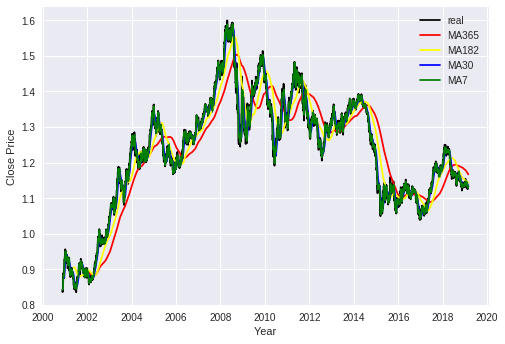

In [0]:
plt.plot(data_serie, color='black', label='real')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.plot(moving_avg365, color='red', label='MA365')
plt.plot(moving_avg182, color='yellow', label='MA182')
plt.plot(moving_avg30, color='blue', label='MA30')
plt.plot(moving_avg7, color='green', label='MA7')
plt.legend()
plt.show()

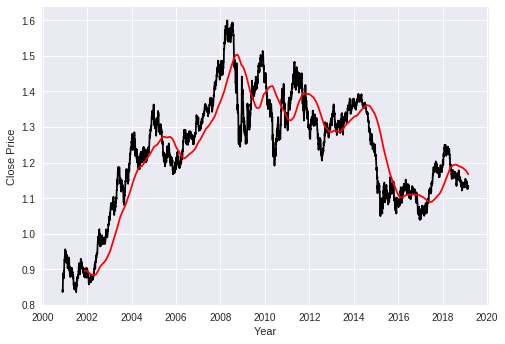

In [0]:
plt.plot(data_serie, color='black')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.plot(moving_avg365, color='red')
plt.show()

Como vemos en el gráfico anterior la media móvil anual nos demuestra que existe un tendencia bastante marcada

In [0]:
from statsmodels.tsa.stattools import adfuller
fuller = adfuller(data_serie, autolag='AIC')
dfoutput = pd.Series(fuller[0:4], index=['ADF Test Statistic','p-value','#Lags usados','Numero de observaciones'])
for key,value in fuller[4].items():
    dfoutput['Valor crítico del Test Statistic (%s)'%key] = value
print(dfoutput)

ADF Test Statistic                          -2.460337
p-value                                      0.125425
#Lags usados                                 4.000000
Numero de observaciones                   6665.000000
Valor crítico del Test Statistic (1%)       -3.431332
Valor crítico del Test Statistic (5%)       -2.861974
Valor crítico del Test Statistic (10%)      -2.567001
dtype: float64


El p-value de 0.12 nos indica que tanto al 5% como al 10% la serie es no estacionaria y por tanto habrá que separar sus componentes antes de modelizar 

In [0]:
diff_1 = data_serie-data_serie.shift(1)

print(diff_1[1:10])

date
2000-11-23   -0.0062
2000-11-24    0.0012
2000-11-25    0.0000
2000-11-26    0.0000
2000-11-27    0.0133
2000-11-28    0.0045
2000-11-29    0.0017
2000-11-30    0.0141
2000-12-01    0.0067
Freq: D, Name: 4. close, dtype: float64


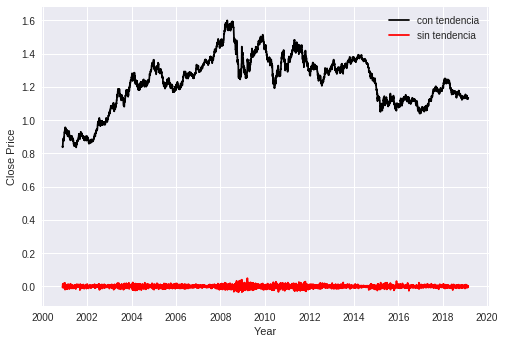

In [0]:
plt.plot(data_serie, color='black', label ='con tendencia')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.plot(diff_1, color='red', label = 'sin tendencia')
plt.legend()
plt.show()

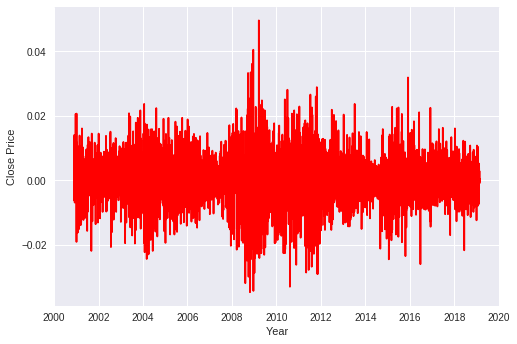

In [0]:
plt.plot(diff_1, color='red')
plt.xlabel('Year')
plt.ylabel('Close Price')

plt.show()

Como vemos aplicando una diferencia la tendencia desaparece y no se aprecia estacionalidad. 

Vamos a usar una librería que nos permitirá automáticamene separa la serie en sus componentes

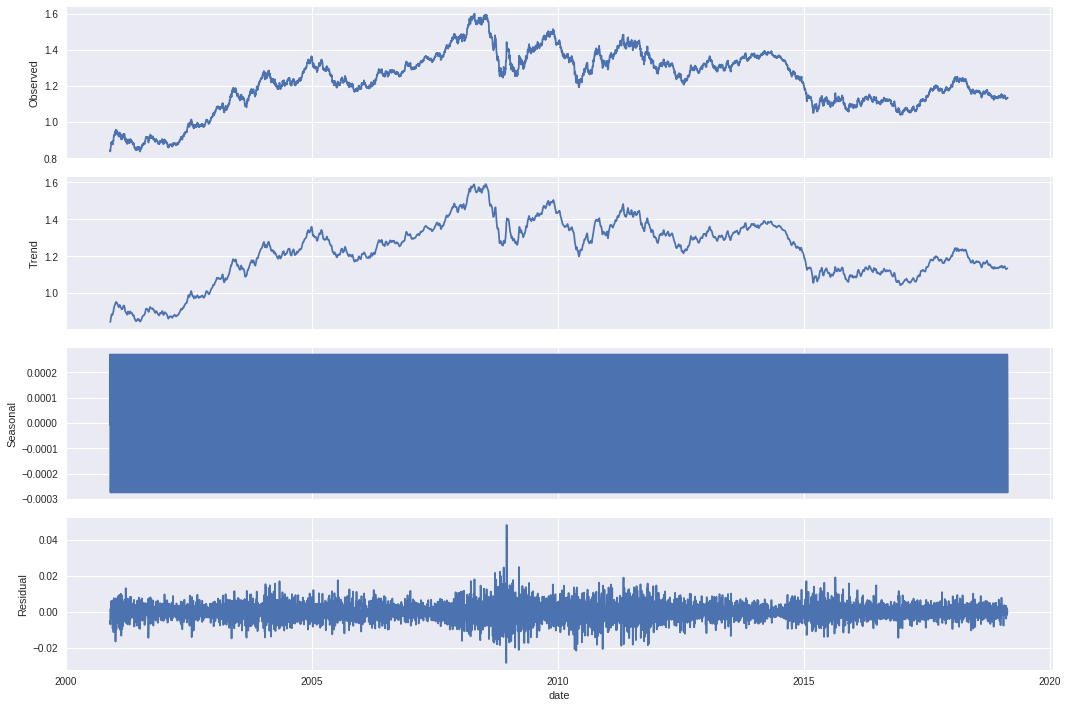

In [0]:
data_serie.values

rcParams['figure.figsize'] = 15, 10
decomposition = sm.tsa.seasonal_decompose(data_serie, model='additive', two_sided=True )
fig = decomposition.plot()
plt.show()

In [0]:
fuller = adfuller(decomposition.resid[~np.isnan(decomposition.resid)], autolag='AIC')
dfoutput = pd.Series(fuller[0:4], index=['ADF Test Statistic','p-value','#Lags usados','Numero de observaciones'])
for key,value in fuller[4].items():
    dfoutput['Valor crítico del Test Statistic (%s)'%key] = value
print(dfoutput)

ADF Test Statistic                         -22.318563
p-value                                      0.000000
#Lags usados                                35.000000
Numero de observaciones                   6628.000000
Valor crítico del Test Statistic (1%)       -3.431337
Valor crítico del Test Statistic (5%)       -2.861976
Valor crítico del Test Statistic (10%)      -2.567002
dtype: float64


Es estacionaria al 99%, su p-value < 1% luego podemos modelar su residuo

Vamos a usar autorima por que las ACF y PACF no vislumbran fácilmente la estructura. Forzaremos el algoritmo a tener una diferencia 1, que como hemos visto elimina la tendencia. 

In [0]:
from pmdarima.arima import auto_arima, ndiffs, ADFTest
import pmdarima as pmd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, seasonal_plot
#https://github.com/tgsmith61591/pmdarima
#https://www.alkaline-ml.com/pmdarima/

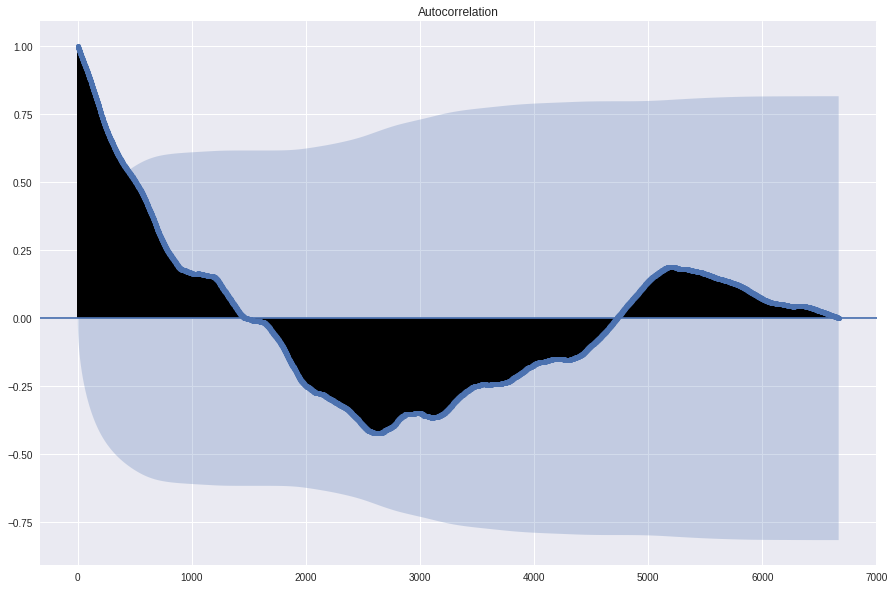

In [0]:
plot_acf(data_serie)
plt.show()

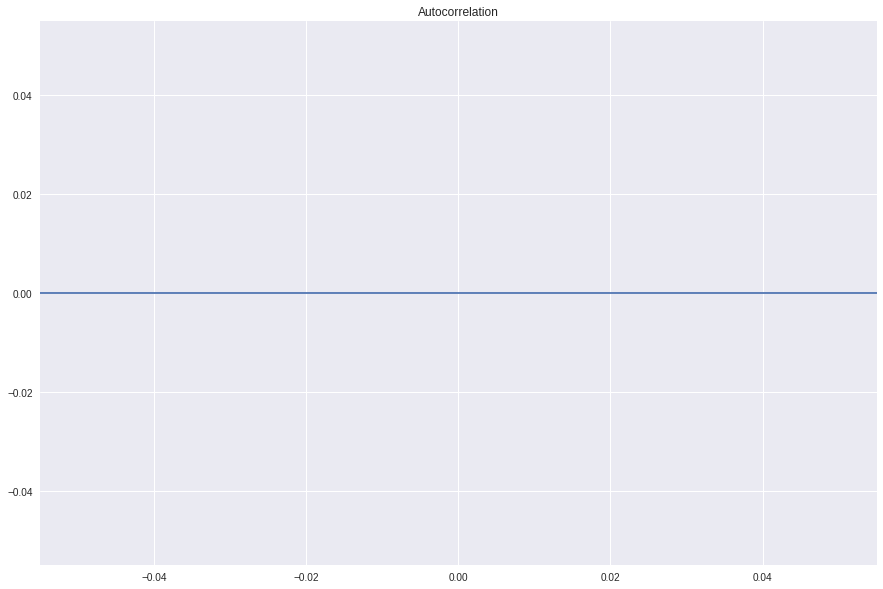

In [0]:
plot_acf(diff_1)
plt.show()

In [0]:
decomposition.resid

date
2000-11-22         NaN
2000-11-23         NaN
2000-11-24         NaN
2000-11-25   -0.005069
2000-11-26   -0.007070
2000-11-27    0.001546
2000-11-28    0.000224
2000-11-29   -0.004036
2000-11-30    0.004030
2000-12-01    0.005733
2000-12-02    0.002260
2000-12-03   -0.002385
2000-12-04    0.004460
2000-12-05   -0.003190
2000-12-06    0.006021
2000-12-07    0.003259
2000-12-08   -0.000667
2000-12-09   -0.000497
2000-12-10    0.001715
2000-12-11   -0.004525
2000-12-12   -0.003476
2000-12-13   -0.009465
2000-12-14    0.001873
2000-12-15    0.006290
2000-12-16    0.004388
2000-12-17   -0.000999
2000-12-18   -0.006582
2000-12-19   -0.011390
2000-12-20    0.004764
2000-12-21    0.002544
                ...   
2019-01-27    0.000015
2019-01-28    0.000032
2019-01-29   -0.000033
2019-01-30    0.003664
2019-01-31   -0.000684
2019-02-01    0.000147
2019-02-02    0.000617
2019-02-03    0.002487
2019-02-04    0.002160
2019-02-05    0.000895
2019-02-06   -0.001008
2019-02-07   -0.001913
2019-0

In [0]:
ndiffs(data_serie)

1

confirmamos que es una diferencia

In [0]:
ADFTest(diff_1)

ADFTest(alpha=date
2000-11-22       NaN
2000-11-23   -0.0062
2000-11-24    0.0012
2000-11-25    0.0000
2000-11-26    0.0000
2000-11-27    0.0133
2000-11-28    0.0045
2000-11-29    0.0017
2000-11-30    0.0141
2000-12-01    0.0067
2000-12-02    0.0000
2000-12-03    0.0000
2000-12-04    0.0090
2000-12-05   -0....0000
2019-02-24    0.0000
2019-02-25    0.0005
Freq: D, Name: 4. close, Length: 6670, dtype: float64,
    k=None)

## SARIMA

Como hemos visto anteriormente vamos a aplicar un AutoArima sin parte estaciona con una diferencia de 1

In [0]:
stepwise_model = auto_arima(data_serie, start_p=0, start_q=0,
                           max_p=12, max_q=12, 
                           P=0, Q=0,
                           max_P=12, max_Q=12, 
                           seasonal=True,
                           d=1, D=0, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True,
                           n_fits=20,
                           scoring='mae',
                           solver='newton',
                           information_criterion= 'bic')
print(stepwise_model.aic())

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-48439.749, BIC=-48426.138, Fit time=0.523 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-48439.732, BIC=-48419.317, Fit time=0.544 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-48439.662, BIC=-48419.246, Fit time=1.302 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-48438.072, BIC=-48410.851, Fit time=3.088 seconds
Total fit time: 5.462 seconds
-48439.748550099


In [0]:
print(stepwise_model.summary().tables[0])
print(stepwise_model.summary().tables[1])
print(stepwise_model.summary().tables[2])
#https://stats.stackexchange.com/questions/130368/why-do-i-get-this-p-value-doing-the-jarque-bera-test-in-r

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 6670
Model:               SARIMAX(0, 1, 0)   Log Likelihood               24221.874
Date:                Sun, 24 Feb 2019   AIC                         -48439.749
Time:                        19:39:37   BIC                         -48426.138
Sample:                             0   HQIC                        -48435.047
                               - 6670                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.362e-05   7.84e-05      0.556      0.578      -0.000       0.000
sigma2        4.1e-05   4.01e-07    102.145      0.000    4.02e-05    4.18e-05
Ljung-Box (Q):                       45.68   Jarque-

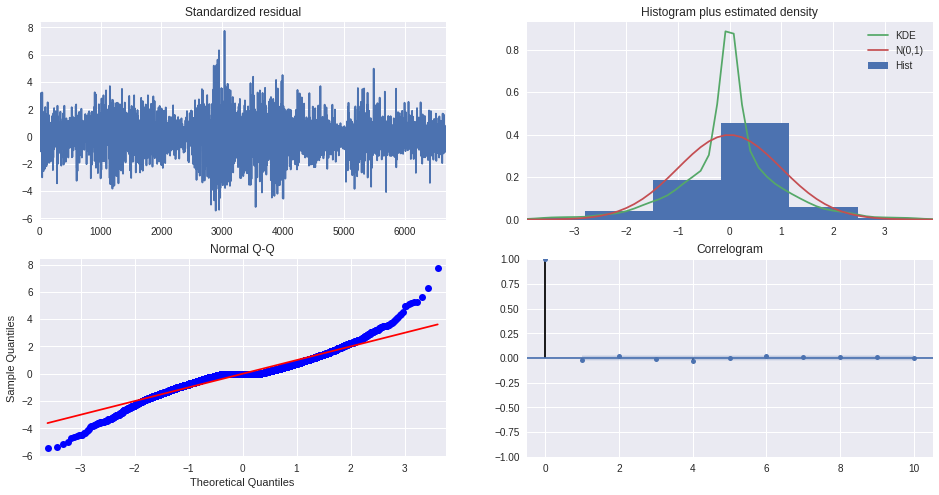

In [0]:
stepwise_model.plot_diagnostics(figsize=(16, 8))
plt.show()

Por los resultados obtenidos vemos que tenemos un modelo ARIMA (0,1,0). Lo que indíca que no hay componentes AR ni MA y por tanto es un "random walk".


Vamos a probar a meter la serie directamente diferenciada a ver si nos da otro valor


In [0]:
stepwise_model_2 = auto_arima(diff_1[1:], start_p=0, start_q=0,
                           max_p=12, max_q=12, 
                           P=0, Q=0,
                           max_P=12, max_Q=12, 
                           seasonal=True,
                           d=0, D=0, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True,
                           n_fits=20,
                           scoring='mae',
                           solver='newton',
                           information_criterion= 'bic')
print(stepwise_model_2.aic())

Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-48439.749, BIC=-48426.138, Fit time=0.569 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-48439.732, BIC=-48419.317, Fit time=0.487 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-48439.662, BIC=-48419.246, Fit time=1.273 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-48438.072, BIC=-48410.851, Fit time=5.396 seconds
Total fit time: 7.729 seconds
-48439.7485500453


In [0]:
print(stepwise_model_2.summary().tables[0])
print(stepwise_model_2.summary().tables[1])
print(stepwise_model_2.summary().tables[2])
#https://stats.stackexchange.com/questions/130368/why-do-i-get-this-p-value-doing-the-jarque-bera-test-in-r

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 6669
Model:                        SARIMAX   Log Likelihood               24221.874
Date:                Sun, 24 Feb 2019   AIC                         -48439.749
Time:                        19:39:46   BIC                         -48426.138
Sample:                             0   HQIC                        -48435.047
                               - 6669                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.362e-05   7.84e-05      0.556      0.578      -0.000       0.000
sigma2        4.1e-05   4.01e-07    102.144      0.000    4.02e-05    4.18e-05
Ljung-Box (Q):                       45.68   Jarque-

Nuevamente obtenemos un ARMA(0,0), recordemos que la serie está diferenciada.

Podemos concluir que en este caso el modelo ARIMA no nos aporta nada

## Exponential Smoothing

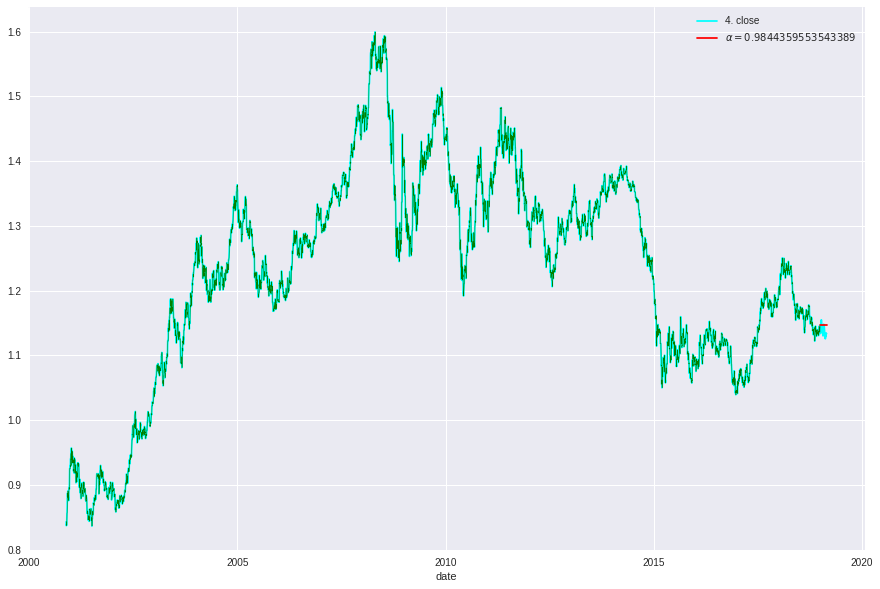

In [0]:
from statsmodels.tsa.api import SimpleExpSmoothing

#pintar datos reales
data_serie['2000-11-22':'2019-02-24'].plot(color='cyan',legend=True)

# Se prueban modelos basados en exponential smoothing (Simple, Holt y Holt&  Winters)
# Simple Exponential Smoothing

#Exponencial simple
fit_es = SimpleExpSmoothing(data_serie['2000-11-22':'2018-12-31']).fit()
fcast_es = fit_es.forecast(60).rename(r'$\alpha=%s$'%fit_es.model.params['smoothing_level']) #se deja el parámetro de autoajuste de alfa

# mostrar la predicción para los dos primeros meses de 2019 así como el ajuste de la curva para todo el histórico de datos previo
fcast_es.plot( color='red', legend=True)
fit_es.fittedvalues.plot( color='green',linewidth=0.5)

plt.show()

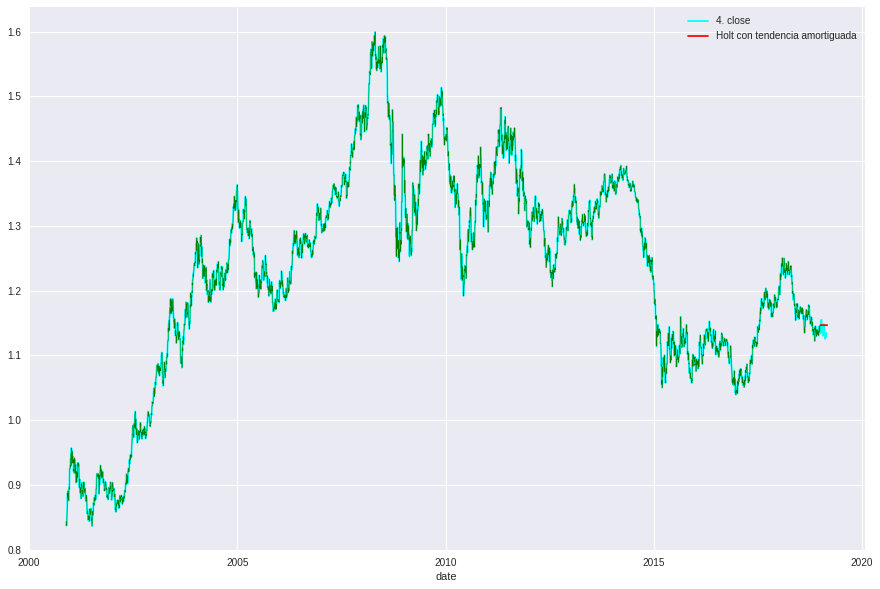

In [0]:
from statsmodels.tsa.api import Holt

#pintar datos reales
data_serie['2000-11-22':'2019-02-24'].plot(color='cyan',legend=True)

#modelo de Holt con amortiguación
fit_h = Holt(data_serie['2000-11-22':'2018-12-31'], damped=True).fit(smoothing_slope=0.2)
fcast_h = fit_h.forecast(60).rename("Holt con tendencia amortiguada")

# mostrar la predicción para los dos primeros meses de 2019 así como el ajuste de la curva para todo el histórico de datos previo
fcast_h.plot(color='red', legend=True)
fit_h.fittedvalues.plot( color='green',linewidth=0.5)

plt.show()

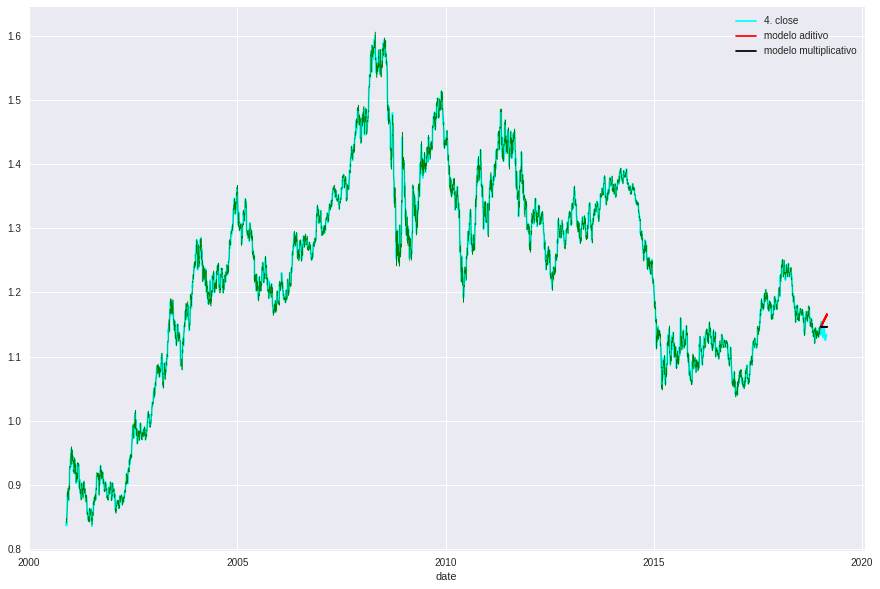

In [0]:
from statsmodels.tsa.api import ExponentialSmoothing
#datos reales
data_serie['2000-11-22':'2019-02-24'].plot(color='cyan',legend=True)

#modelo Holt and Winters que contempla la estacionalidad
fit_hw_add = ExponentialSmoothing(data_serie['2000-11-22':'2018-12-31'],seasonal_periods=7,trend='add',seasonal='add').fit(use_boxcox=True)
fcast_hw_add = fit_hw_add.forecast(60).rename('modelo aditivo') 

fit_hw_mul = ExponentialSmoothing(data_serie['2015-11-22':'2018-12-31'],seasonal_periods=3,trend='add',seasonal='mul',damped=True).fit(use_boxcox=True)
fcast_hw_mul = fit_hw_mul.forecast(60).rename('modelo multiplicativo') 

# mostrar la predicción para los dos primeros meses de 2019 así como el ajuste de la curva para todo el histórico de datos previo
fcast_hw_add.plot(color='red', legend=True)
fcast_hw_mul.plot(color='black', legend=True)
fit_hw_add.fittedvalues.plot( color='green',linewidth=0.5)

plt.show()

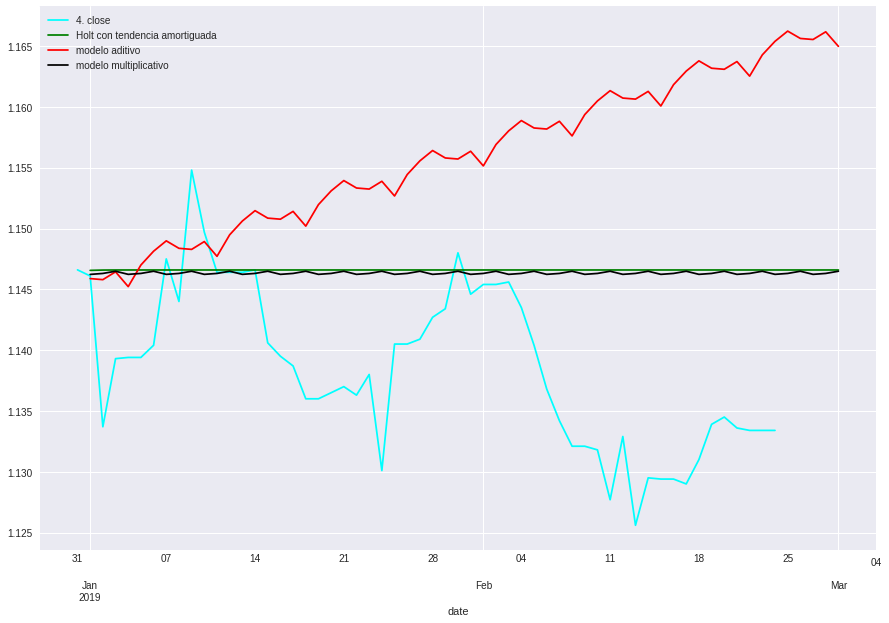

In [0]:
#detallado
data_serie['2018-12-31':'2019-02-24'].plot(color='cyan',legend=True)
fcast_h.plot(color='green', legend=True)
fcast_hw_add.plot(color='red', legend=True)
fcast_hw_mul.plot(color='black', legend=True)
plt.show()

## DLM

Probamos otro modelo económetrico clásico, aunque viendo los resultados de ARIMA lo normal es que no obtengamios buenos resultados. Quizás para usar este modelo necesitaríamos tener alguna otra variable que nos ayudara a explicar nuestro target. Estas variable podrían ser macroeconómicas como: balanza comercial EEUU-Europa, datos de PIB, etc...

No obstante lo mostramos a modo ilustrativo ya que son un tipo de modelos bastante utilizados.

En este caso funcionan mejor las librerias de R. En este software tenemos una magnifica librería, BSTS, que nos permite realizar este tipo de modelos con un montón de funcionalidades.

http://www.unofficialgoogledatascience.com/2017/07/fitting-bayesian-structural-time-series.html

In [0]:
from pydlm import dlm, trend, seasonality, dynamic, autoReg, longSeason
#https://pydlm.github.io/

In [0]:
# construct the base
myDLM = dlm(data_serie.values)


In [0]:
# adding model components
# add a first-order trend (linear trending) with prior covariance 1.0
myDLM = myDLM + trend(0, name='lineTrend', w=3)


In [0]:
# add a 3 step auto regression
myDLM = myDLM + autoReg(degree=1, data=data, name='ar1', w=1.0)


/usr/local/lib/python3.6/dist-packages/pydlm/modeler/autoReg.py:74: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


In [0]:
# show the added components
myDLM.ls()

The static components are
lineTrend (degree = 1)
 
There is no dynamic component.
 
The automatic components are
ar1 (dimension = 1)


In [0]:
# fit forward filter
myDLM.fitForwardFilter()
# fit backward smoother
myDLM.fitBackwardSmoother()

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


In [0]:
myDLM.getMSE()

0.000163004895112875

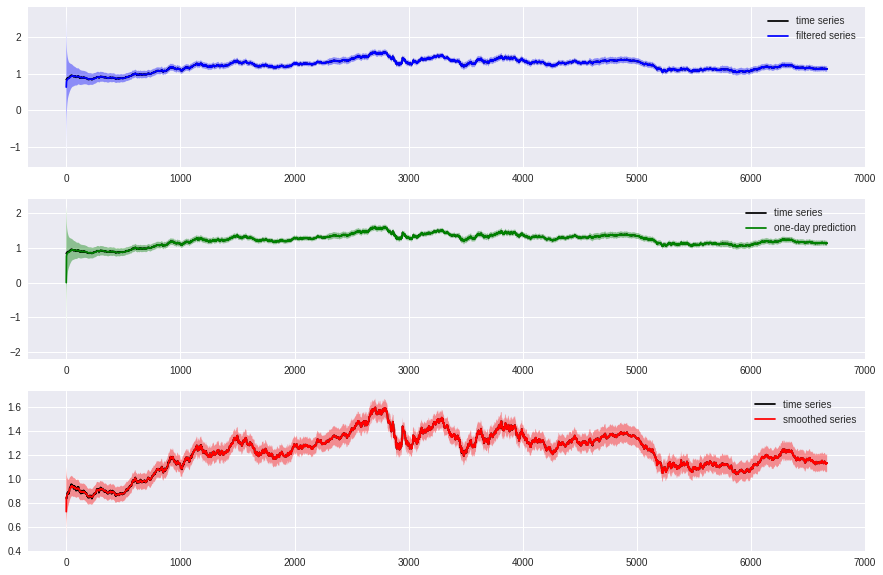

In [0]:
# plot the results
myDLM.plot()


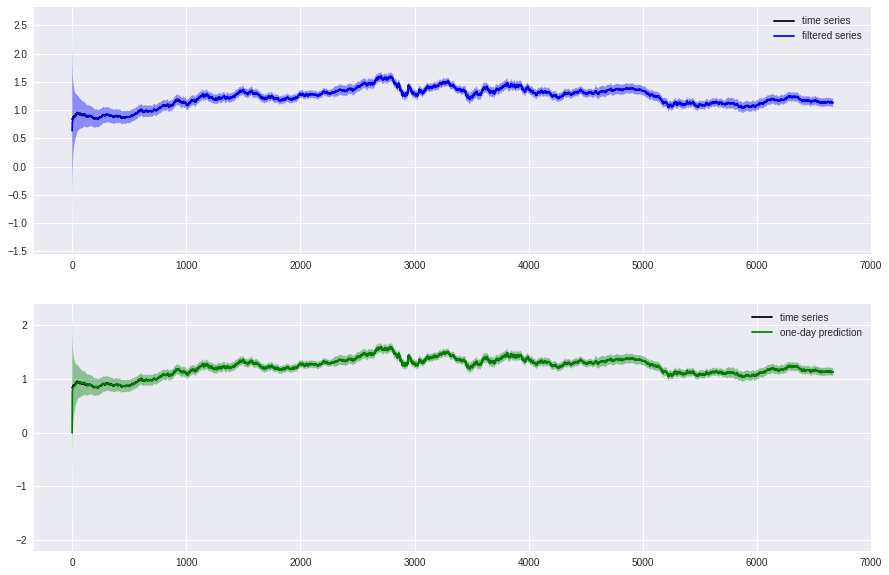

In [0]:
# plot only the filtered results
myDLM.turnOff('smoothed plot')
myDLM.plot()


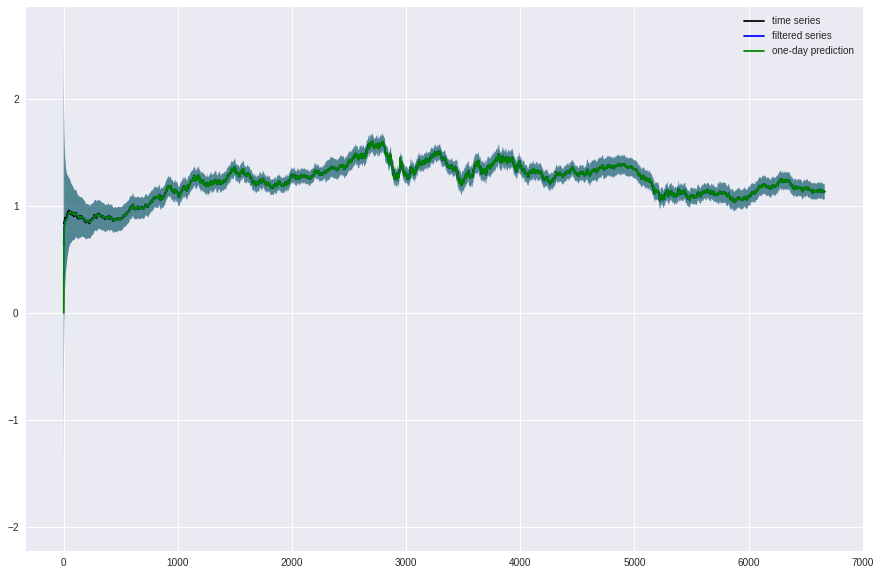

In [0]:
# plot in one figure
myDLM.turnOff('multiple plots')
myDLM.plot()

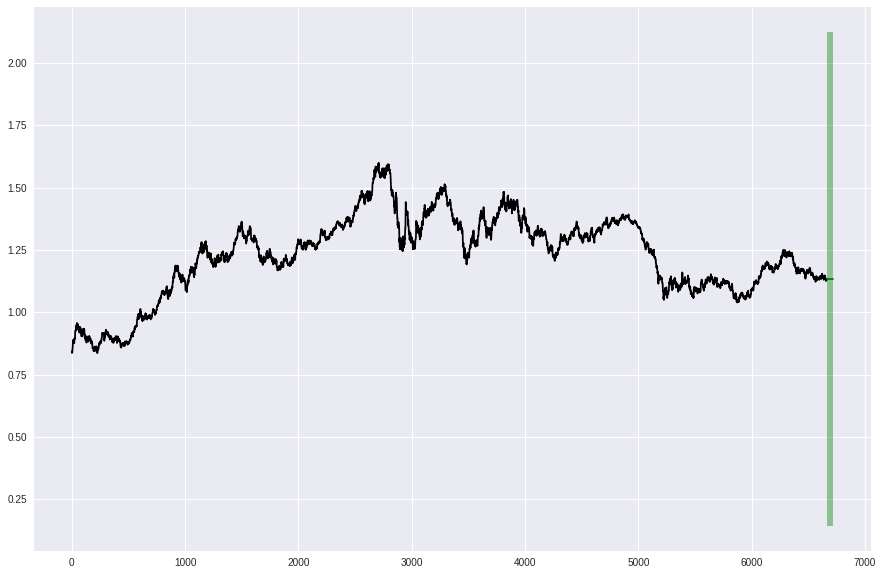

In [0]:
myDLM.plotPredictN( N=50)

Como vemos en el gráfico el modelo para predicir directamente "tira una línea media"  desde el último valor y con muchísimo error.

Está claro que tenemos que atacar el problema con modelos más sofisticados que nos ayuden a encontrar relaciones entre datos que con análisis sencillos no somos capaces de ver.

Para solucionar nuestro problema acudiremos a la Inteligencia Artificial y en concreto al Deep Learning

# Modelos de Deep Learning

## Red Neuronal Sencilla usando variables sintéticas

In [0]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
from keras.optimizers import Nadam
from keras.layers import Dropout

Using TensorFlow backend.


In [0]:
data_serie_DF = data_serie.to_frame()

In [0]:
data_serie_DF.head()

,4. close
date,
2000-11-22,0.8430
2000-11-23,0.8368
2000-11-24,0.8380
2000-11-25,0.8380
2000-11-26,0.8380


In [0]:
data_serie_DF.tail()

,4. close
date,
2019-02-21,1.1336
2019-02-22,1.1334
2019-02-23,1.1334
2019-02-24,1.1334
2019-02-25,1.1339


Vamos a crear varias variables sintéticas con distintos retardos: 1 a 5 días, un mes y un año

In [0]:
data_serie_DF['4. close_1'] = data_serie_DF['4. close'].shift(1)
data_serie_DF['4. close_2'] = data_serie_DF['4. close'].shift(2)
data_serie_DF['4. close_3'] = data_serie_DF['4. close'].shift(3)
data_serie_DF['4. close_4'] = data_serie_DF['4. close'].shift(4)
data_serie_DF['4. close_5'] = data_serie_DF['4. close'].shift(5)

data_serie_DF['4. close_30'] = data_serie_DF['4. close'].shift(30)

data_serie_DF['4. close_365'] = data_serie_DF['4. close'].shift(365)

In [0]:
data_serie_DF.head()

,4. close,4. close_1,4. close_2,4. close_3,4. close_4,4. close_5,4. close_30,4. close_365
date,,,,,,,,
2000-11-22,0.8430,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-11-23,0.8368,0.8430,NaN,NaN,NaN,NaN,NaN,NaN
2000-11-24,0.8380,0.8368,0.8430,NaN,NaN,NaN,NaN,NaN
2000-11-25,0.8380,0.8380,0.8368,0.8430,NaN,NaN,NaN,NaN
2000-11-26,0.8380,0.8380,0.8380,0.8368,0.843,NaN,NaN,NaN


In [0]:
start= data_serie_DF.index.searchsorted(dt.datetime(2001, 12, 10))
end = data_serie_DF.index.searchsorted(dt.datetime(2019, 2, 21))

data_serie_DF = data_serie_DF.iloc[start:end]

In [0]:
data_serie_DF.head()

,4. close,4. close_1,4. close_2,4. close_3,4. close_4,4. close_5,4. close_30,4. close_365
date,,,,,,,,
2001-12-10,0.8892,0.8894,0.8894,0.8894,0.8949,0.8865,0.8938,0.8831
2001-12-11,0.8914,0.8892,0.8894,0.8894,0.8894,0.8949,0.8938,0.8766
2001-12-12,0.8980,0.8914,0.8892,0.8894,0.8894,0.8894,0.8947,0.8795
2001-12-13,0.8932,0.8980,0.8914,0.8892,0.8894,0.8894,0.8811,0.8755
2001-12-14,0.9041,0.8932,0.8980,0.8914,0.8892,0.8894,0.8831,0.8889


In [0]:
targets = data_serie_DF['4. close']
variables = data_serie_DF.drop(['4. close'], axis=1, inplace=False)

In [0]:
targets.head()

date
2001-12-10    0.8892
2001-12-11    0.8914
2001-12-12    0.8980
2001-12-13    0.8932
2001-12-14    0.9041
Freq: D, Name: 4. close, dtype: float64

In [0]:
variables.head()

,4. close_1,4. close_2,4. close_3,4. close_4,4. close_5,4. close_30,4. close_365
date,,,,,,,
2001-12-10,0.8894,0.8894,0.8894,0.8949,0.8865,0.8938,0.8831
2001-12-11,0.8892,0.8894,0.8894,0.8894,0.8949,0.8938,0.8766
2001-12-12,0.8914,0.8892,0.8894,0.8894,0.8894,0.8947,0.8795
2001-12-13,0.8980,0.8914,0.8892,0.8894,0.8894,0.8811,0.8755
2001-12-14,0.8932,0.8980,0.8914,0.8892,0.8894,0.8831,0.8889


Muestreamos test y entrenamiento

In [0]:
start_tr= data_serie_DF.index.searchsorted(dt.datetime(2001, 12, 10))
end_tr = data_serie_DF.index.searchsorted(dt.datetime(2019, 1, 1))

target_train = targets.iloc[start_tr:end_tr]
variables_train = variables.iloc[start_tr:end_tr]

start_test= data_serie_DF.index.searchsorted(dt.datetime(2019, 1, 1))
end_test = data_serie_DF.index.searchsorted(dt.datetime(2019, 2, 21))


target_test = targets.iloc[start_test:end_test]
variables_test = variables.iloc[start_test:end_test]

In [0]:
target_train.head(), target_train.tail()

(date
 2001-12-10    0.8892
 2001-12-11    0.8914
 2001-12-12    0.8980
 2001-12-13    0.8932
 2001-12-14    0.9041
 Freq: D, Name: 4. close, dtype: float64, date
 2018-12-27    1.1429
 2018-12-28    1.1442
 2018-12-29    1.1442
 2018-12-30    1.1439
 2018-12-31    1.1466
 Freq: D, Name: 4. close, dtype: float64)

In [0]:
target_test.head(), target_test.tail()

(date
 2019-01-01    1.1461
 2019-01-02    1.1337
 2019-01-03    1.1393
 2019-01-04    1.1394
 2019-01-05    1.1394
 Freq: D, Name: 4. close, dtype: float64, date
 2019-02-16    1.1294
 2019-02-17    1.1290
 2019-02-18    1.1310
 2019-02-19    1.1339
 2019-02-20    1.1345
 Freq: D, Name: 4. close, dtype: float64)

In [0]:
X_train = variables_train.values
X_test = variables_test.values
y_train = target_train.values
y_test = target_test.values


y_train = y_train*1
y_test = y_test*1

In [0]:

scale = StandardScaler()

X_scale_train = scale.fit_transform(X_train)
X_scale_test = scale.transform(X_test)



In [0]:
y_train,y_test,X_train,X_test

(array([0.8892, 0.8914, 0.898 , ..., 1.1442, 1.1439, 1.1466]),
 array([1.1461, 1.1337, 1.1393, 1.1394, 1.1394, 1.1404, 1.1475, 1.144 ,
        1.1548, 1.1497, 1.1464, 1.1464, 1.1464, 1.1466, 1.1406, 1.1395,
        1.1387, 1.136 , 1.136 , 1.1365, 1.137 , 1.1363, 1.138 , 1.1301,
        1.1405, 1.1405, 1.1409, 1.1427, 1.1434, 1.148 , 1.1446, 1.1454,
        1.1454, 1.1456, 1.1435, 1.1404, 1.1368, 1.1342, 1.1321, 1.1321,
        1.1318, 1.1277, 1.1329, 1.1256, 1.1295, 1.1294, 1.1294, 1.129 ,
        1.131 , 1.1339, 1.1345]),
 array([[0.8894, 0.8894, 0.8894, ..., 0.8865, 0.8938, 0.8831],
        [0.8892, 0.8894, 0.8894, ..., 0.8949, 0.8938, 0.8766],
        [0.8914, 0.8892, 0.8894, ..., 0.8894, 0.8947, 0.8795],
        ...,
        [1.1442, 1.1429, 1.1355, ..., 1.14  , 1.1388, 1.1994],
        [1.1442, 1.1442, 1.1429, ..., 1.1406, 1.1319, 1.1994],
        [1.1439, 1.1442, 1.1442, ..., 1.1355, 1.1319, 1.1997]]),
 array([[1.1466, 1.1439, 1.1442, 1.1442, 1.1429, 1.1332, 1.2014],
        [1.1

In [0]:
l=0.01
rate = 0.1
x = Input(shape=(7,))
layer = Dense(100, activation='softsign', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l1(l))(x)
layer = Dropout(rate)(layer)
layer = BatchNormalization()(layer)
layer = Dense(100, activation='softsign', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l1(l))(layer)
layer = Dropout(rate)(layer)
layer = BatchNormalization()(layer)
layer = Dense(100, activation='softsign', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l1(l))(layer)
layer = Dropout(rate)(layer)
layer = BatchNormalization()(layer)
y = Dense(1, activation='linear',kernel_initializer='he_uniform')(layer)
mlp = Model(x, y)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
nadam = Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)

#callback = [EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto', baseline=None, restore_best_weights=False)]
mlp.compile(optimizer='nadam',
            loss='mean_squared_error',
            metrics=['mae'])

In [0]:
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 7)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               800       
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
__________

In [0]:
mlp.fit(X_scale_train, y_train,
                epochs=100,
                batch_size=10,
                shuffle=True,
#                callbacks = callback,
                 validation_split=0.1)

Instructions for updating:
Use tf.cast instead.
Train on 5607 samples, validate on 624 samples
Epoch 1/100
5607/5607 [==============================] - 9s 2ms/step - loss: 9.4646 - mean_absolute_error: 0.3706 - val_loss: 3.1356 - val_mean_absolute_error: 0.5927
Epoch 2/100
5607/5607 [==============================] - 6s 1ms/step - loss: 1.0169 - mean_absolute_error: 0.1590 - val_loss: 0.3209 - val_mean_absolute_error: 0.0307
Epoch 3/100
5607/5607 [==============================] - 6s 1ms/step - loss: 0.4367 - mean_absolute_error: 0.1125 - val_loss: 0.1287 - val_mean_absolute_error: 0.0337
Epoch 4/100
5607/5607 [==============================] - 6s 1ms/step - loss: 0.2018 - mean_absolute_error: 0.0852 - val_loss: 0.0582 - val_mean_absolute_error: 0.0225
Epoch 5/100
5607/5607 [==============================] - 6s 1ms/step - loss: 0.0629 - mean_absolute_error: 0.0590 - val_loss: 0.0583 - val_mean_absolute_error: 0.0094
Epoch 6/100
5607/5607 [==============================] - 6s 1ms/step -

KeyboardInterrupt: ignored

In [0]:
mlp.evaluate(X_scale_test, y_test)

El resultado en test es bastante aceptable. Como vemos hemos conseguido entrenar nuestro modelo con las variables sintéticas que hemos creado. Seguramente la propia red ha encontrado relaciones entre esas variables...

¿Pero que sucedería si no hubieramos encontrado nosotros las sintéticas ya que no tuvieramos un conocimento exacto del problema?

Podemos recurrir a otro tipo de redes que pueden encontrar esas relaciones por sÍ solas.

En los siguientes pasos recurriremos a una CNN y una RNN

## MLP vs CNN vs RNN Simple vs GRU vs LSTM vs CNN+GRU


In [0]:
df_serie = data_serie.to_frame()
df_serie.tail()

,4. close
date,
2019-02-21,1.1336
2019-02-22,1.1334
2019-02-23,1.1334
2019-02-24,1.1334
2019-02-25,1.1334


Función para dividir en train y test, seleccionando la ventana temporal hacia atrás que se quiere seleccionar.

In [0]:
import datetime
import numpy as np

def train_test_by_date(df_serie, window_size, start_date_test):
  aux_date = start_date_test - datetime.timedelta(days = window_size)
  df_train = df_serie[df_serie.index < start_date_test]
  df_test = df_serie[df_serie.index >= aux_date]
  
  data_stored = [] # X_train, y_train, X_test, y_test
  for df in [df_train, df_test]:
    data_seq = np.empty((len(df) - window_size, window_size))
    for i in range(len(df) - window_size):
      seq = np.array(df.iloc[i:i+window_size].values).flatten()
      data_seq[i] = seq
      
    data_stored.append(data_seq)
    data_stored.append(df.iloc[window_size:].values)
   
  return data_stored[0], data_stored[1], data_stored[2], data_stored[3]

In [0]:
WINDOW_SIZE = 30 # days
DT_TEST = dt.datetime(2019, 1, 1)

X_train, y_train, X_test, y_test = train_test_by_date(df_serie, WINDOW_SIZE, DT_TEST)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(6584, 30) (6584, 1) (56, 30) (56, 1)


In [0]:
# Normalizamos los datos de entrada
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)

### CNN

In [0]:
from keras.layers import Conv1D, Input, Flatten, Dense, Dropout, BatchNormalization
from keras.models import Model

def create_cnn_model():
  
  i = Input(shape = (1, WINDOW_SIZE,))
  x = Conv1D(7, 1, activation = 'tanh')(i)
  x = Conv1D(30, 1, activation = 'tanh')(x)
  x = Flatten()(x)
  x = Dense(64, activation='tanh')(x)
  out = Dense(1, activation = 'linear')(x)
  
  model = Model(i, out)
  
  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
  
  return model

Using TensorFlow backend.


In [0]:
cnn_model = create_cnn_model()
cnn_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 30)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 7)              217       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1, 30)             240       
_________________________________________________________________
flatten_1 (Flatten)          (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1984      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 2,506
Trainable params: 2,506
Non-trainable params: 0
__

In [0]:
history_cnn=cnn_model.fit(np.expand_dims(X_train_norm, axis = 1), y_train, epochs=20, batch_size = 64, validation_data = (np.expand_dims(X_test_norm, axis = 1), y_test))

Instructions for updating:
Use tf.cast instead.
Train on 6584 samples, validate on 56 samples
Epoch 1/20
6584/6584 [==============================] - 5s 823us/step - loss: 0.3420 - mean_absolute_error: 0.4021 - val_loss: 0.0024 - val_mean_absolute_error: 0.0459
Epoch 2/20
6584/6584 [==============================] - 0s 70us/step - loss: 0.0035 - mean_absolute_error: 0.0453 - val_loss: 1.7124e-04 - val_mean_absolute_error: 0.0107
Epoch 3/20
6584/6584 [==============================] - 0s 71us/step - loss: 0.0017 - mean_absolute_error: 0.0321 - val_loss: 1.5111e-04 - val_mean_absolute_error: 0.0098
Epoch 4/20
6584/6584 [==============================] - 0s 71us/step - loss: 0.0011 - mean_absolute_error: 0.0253 - val_loss: 1.1859e-04 - val_mean_absolute_error: 0.0085
Epoch 5/20
6584/6584 [==============================] - 0s 72us/step - loss: 8.1477e-04 - mean_absolute_error: 0.0221 - val_loss: 7.6142e-05 - val_mean_absolute_error: 0.0069
Epoch 6/20
6584/6584 [============================

In [0]:
cnn_model.evaluate(np.expand_dims(X_test_norm, axis = 1), y_test)

56/56 [==============================] - 0s 262us/step


[3.680035037437587e-05, 0.00472383839743478]

### RNN Simple

In [0]:
from keras.layers import Conv1D, Input, Flatten, Dense, Dropout, LSTM, SimpleRNN
from keras.models import Model

In [0]:
def create_rnn_model():
  
  i = Input(shape = (1, WINDOW_SIZE,))
  x = SimpleRNN(30)(i)
  out = Dense(1, activation = 'linear')(x)
  model = Model(i, out)
  
  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
  
  return model

In [0]:
rnn_model = create_rnn_model()
rnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 1, 30)             0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 30)                1830      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 1,861
Trainable params: 1,861
Non-trainable params: 0
_________________________________________________________________


In [0]:
history_rnn=rnn_model.fit(np.expand_dims(X_train_norm, axis = 1), y_train, epochs=20, batch_size = 64, validation_data = (np.expand_dims(X_test_norm, axis = 1), y_test))

Train on 6584 samples, validate on 56 samples
Epoch 1/20
6584/6584 [==============================] - 1s 113us/step - loss: 1.0015 - mean_absolute_error: 0.9271 - val_loss: 0.6264 - val_mean_absolute_error: 0.7911
Epoch 2/20
6584/6584 [==============================] - 0s 70us/step - loss: 0.1318 - mean_absolute_error: 0.2903 - val_loss: 6.9704e-04 - val_mean_absolute_error: 0.0200
Epoch 3/20
6584/6584 [==============================] - 0s 70us/step - loss: 0.0052 - mean_absolute_error: 0.0562 - val_loss: 9.5853e-04 - val_mean_absolute_error: 0.0250
Epoch 4/20
6584/6584 [==============================] - 0s 71us/step - loss: 0.0034 - mean_absolute_error: 0.0455 - val_loss: 0.0012 - val_mean_absolute_error: 0.0286
Epoch 5/20
6584/6584 [==============================] - 0s 70us/step - loss: 0.0026 - mean_absolute_error: 0.0396 - val_loss: 8.9377e-04 - val_mean_absolute_error: 0.0243
Epoch 6/20
6584/6584 [==============================] - 0s 72us/step - loss: 0.0021 - mean_absolute_error:

### GRU

In [0]:
from keras.layers import GRU, Input, Flatten, Dense
from keras.models import Model

def create_gru_model():
  
  i = Input(shape = (1, WINDOW_SIZE,))
  x = GRU(30)(i)
  #x = Dense(30, activation='tanh')(x)      # comentando esta línea se obtiene un modelo peor pero que podría ser interesante comparar
  out = Dense(1, activation = 'linear')(x)
  
  model = Model(i, out)
  
  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
  
  return model

In [0]:
gru_model = create_gru_model()
gru_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 1, 30)             0         
_________________________________________________________________
gru_1 (GRU)                  (None, 30)                5490      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 5,521
Trainable params: 5,521
Non-trainable params: 0
_________________________________________________________________


In [0]:
history_gru=gru_model.fit(np.expand_dims(X_train_norm, axis = 1), y_train, epochs=20, batch_size = 64, validation_data = (np.expand_dims(X_test_norm, axis = 1), y_test))

Train on 6584 samples, validate on 56 samples
Epoch 1/20
6584/6584 [==============================] - 1s 176us/step - loss: 0.5472 - mean_absolute_error: 0.6433 - val_loss: 0.1670 - val_mean_absolute_error: 0.4077
Epoch 2/20
6584/6584 [==============================] - 1s 95us/step - loss: 0.1296 - mean_absolute_error: 0.2662 - val_loss: 0.0050 - val_mean_absolute_error: 0.0647
Epoch 3/20
6584/6584 [==============================] - 1s 96us/step - loss: 0.0366 - mean_absolute_error: 0.1332 - val_loss: 0.0021 - val_mean_absolute_error: 0.0413
Epoch 4/20
6584/6584 [==============================] - 1s 97us/step - loss: 0.0072 - mean_absolute_error: 0.0591 - val_loss: 0.0012 - val_mean_absolute_error: 0.0312
Epoch 5/20
6584/6584 [==============================] - 1s 97us/step - loss: 0.0018 - mean_absolute_error: 0.0327 - val_loss: 8.3214e-04 - val_mean_absolute_error: 0.0254
Epoch 6/20
6584/6584 [==============================] - 1s 95us/step - loss: 8.8839e-04 - mean_absolute_error: 0.0

### LSTM

In [0]:
def create_lstm_model():
  
  i = Input(shape = (1, WINDOW_SIZE,))
  x = LSTM(30)(i)
  out = Dense(1, activation = 'linear')(x)
  model = Model(i, out)
  
  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
  
  return model

In [0]:
lstm_model = create_lstm_model()
lstm_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 1, 30)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 7,351
Trainable params: 7,351
Non-trainable params: 0
_________________________________________________________________


In [0]:
history_lstm=lstm_model.fit(np.expand_dims(X_train_norm, axis = 1), y_train, epochs=20, batch_size = 64, validation_data = (np.expand_dims(X_test_norm, axis = 1), y_test))

Train on 6584 samples, validate on 56 samples
Epoch 1/20
6584/6584 [==============================] - 1s 209us/step - loss: 0.5551 - mean_absolute_error: 0.6360 - val_loss: 0.1028 - val_mean_absolute_error: 0.3197
Epoch 2/20
6584/6584 [==============================] - 1s 109us/step - loss: 0.1437 - mean_absolute_error: 0.2676 - val_loss: 0.0022 - val_mean_absolute_error: 0.0423
Epoch 3/20
6584/6584 [==============================] - 1s 104us/step - loss: 0.0519 - mean_absolute_error: 0.1481 - val_loss: 0.0111 - val_mean_absolute_error: 0.1042
Epoch 4/20
6584/6584 [==============================] - 1s 103us/step - loss: 0.0149 - mean_absolute_error: 0.0751 - val_loss: 0.0030 - val_mean_absolute_error: 0.0505
Epoch 5/20
6584/6584 [==============================] - 1s 106us/step - loss: 0.0037 - mean_absolute_error: 0.0402 - val_loss: 3.9150e-04 - val_mean_absolute_error: 0.0153
Epoch 6/20
6584/6584 [==============================] - 1s 105us/step - loss: 0.0010 - mean_absolute_error: 0.

### MLP

In [0]:
from keras import regularizers

def create_mlp_model():
  
  x = Input(shape=(WINDOW_SIZE,))
  layer = Dense(100, activation='softsign', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l1(0.01))(x)
  layer = Dropout(0.1)(layer)
  layer = BatchNormalization()(layer)
  layer = Dense(100, activation='softsign', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l1(0.01))(layer)
  layer = Dropout(0.1)(layer)
  layer = BatchNormalization()(layer)
  layer = Dense(100, activation='softsign', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l1(0.01))(layer)
  layer = Dropout(0.1)(layer)
  layer = BatchNormalization()(layer)
  y = Dense(1, activation='linear',kernel_initializer='he_uniform')(layer)
  mlp = Model(x, y)
  
  mlp.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
  
  return mlp

In [0]:
mlp_model = create_mlp_model()

history_mlp=mlp_model.fit(X_train_norm, y_train, epochs=20, batch_size = 64, validation_data = (X_test_norm, y_test))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 6584 samples, validate on 56 samples
Epoch 1/20
6584/6584 [==============================] - 2s 333us/step - loss: 27.2309 - mean_absolute_error: 0.7558 - val_loss: 20.9876 - val_mean_absolute_error: 0.2558
Epoch 2/20
6584/6584 [==============================] - 1s 159us/step - loss: 16.4363 - mean_absolute_error: 0.3652 - val_loss: 11.9718 - val_mean_absolute_error: 0.0347
Epoch 3/20
6584/6584 [==============================] - 1s 162us/step - loss: 9.1297 - mean_absolute_error: 0.3157 - val_loss: 6.4434 - val_mean_absolute_error: 0.1125
Epoch 4/20
6584/6584 [==============================] - 1s 161us/step - loss: 4.9348 - mean_absolute_error: 0.2696 - val_loss: 3.5427 - val_mean_absolute_error: 0.1683
Epoch 5/20
6584/6584 [==============================] - 1s 159us/step - loss: 2.8309 - mean_absolute_error: 0.2420 - val_loss: 2.2875 - val_mean_absolute_error: 0.

### CNN + GRU

In [0]:
from keras.layers import Conv1D, GRU, MaxPooling1D, Input, Flatten, Dense
from keras.models import Model

def create_cnn_gru_model():
  
  i = Input(shape = (1, WINDOW_SIZE,))
  x = Conv1D(30, 1, activation = 'tanh')(i)
  x = GRU(30, dropout=0.1,recurrent_dropout=0.1)(x)
  x = Dense(30, activation='tanh')(x)  
  out = Dense(1, activation = 'linear')(x)
  
  model = Model(i, out)
  
  model.compile(optimizer='nadam', loss='mean_squared_error', metrics=['mae'])
  
  return model

In [0]:
cnn_gru_model = create_cnn_gru_model()
cnn_gru_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 1, 30)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1, 30)             930       
_________________________________________________________________
gru_2 (GRU)                  (None, 30)                5490      
_________________________________________________________________
dense_10 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 31        
Total params: 7,381
Trainable params: 7,381
Non-trainable params: 0
_________________________________________________________________


In [0]:
history_cnn_gru=cnn_gru_model.fit(np.expand_dims(X_train_norm, axis = 1), y_train, epochs=20, batch_size = 64, validation_data = (np.expand_dims(X_test_norm, axis = 1), y_test))

Train on 6584 samples, validate on 56 samples
Epoch 1/20
6584/6584 [==============================] - 2s 316us/step - loss: 0.1721 - mean_absolute_error: 0.2718 - val_loss: 0.0084 - val_mean_absolute_error: 0.0908
Epoch 2/20
6584/6584 [==============================] - 1s 141us/step - loss: 0.0089 - mean_absolute_error: 0.0737 - val_loss: 3.2858e-04 - val_mean_absolute_error: 0.0156
Epoch 3/20
6584/6584 [==============================] - 1s 139us/step - loss: 0.0059 - mean_absolute_error: 0.0594 - val_loss: 8.4927e-05 - val_mean_absolute_error: 0.0074
Epoch 4/20
6584/6584 [==============================] - 1s 139us/step - loss: 0.0051 - mean_absolute_error: 0.0553 - val_loss: 0.0012 - val_mean_absolute_error: 0.0333
Epoch 5/20
6584/6584 [==============================] - 1s 138us/step - loss: 0.0029 - mean_absolute_error: 0.0425 - val_loss: 3.1730e-04 - val_mean_absolute_error: 0.0165
Epoch 6/20
6584/6584 [==============================] - 1s 139us/step - loss: 0.0034 - mean_absolute_e

# Comparación de todas las redes

Por último vamos a mostrar gráficamente las predicciones de cada modelo para datos de 2019, con el objetivo de visualizar la bonda de cada uno.

In [0]:
dates_test = data_serie[data_serie.index >= DT_TEST].index

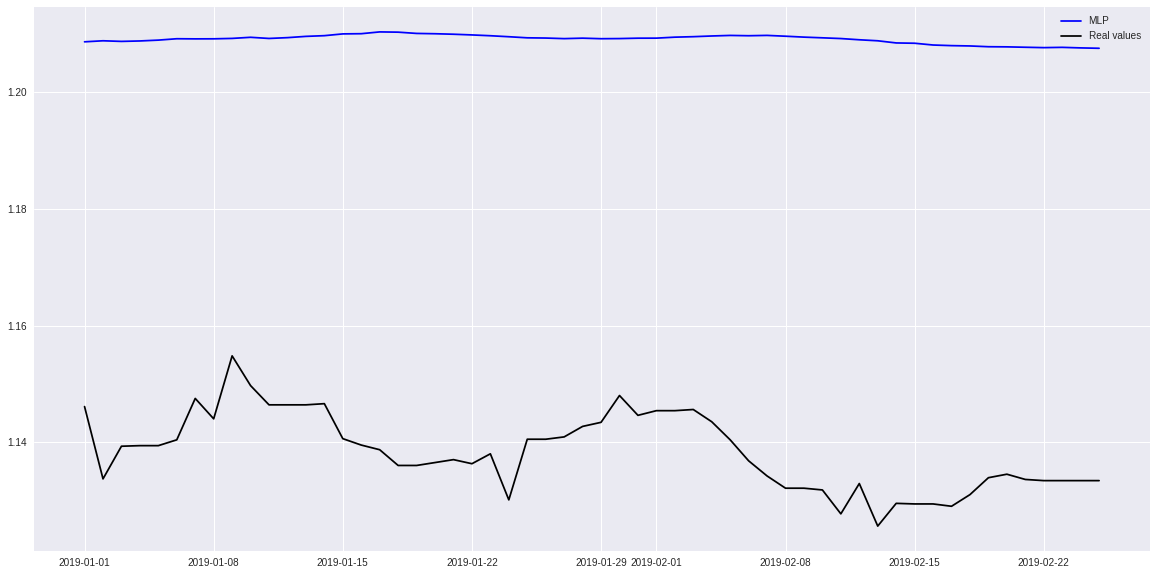

In [0]:
import matplotlib.pyplot as plt

#MLP
preds_mlp = mlp_model.predict(X_test_norm)

plt.figure(figsize=(20,10))
plt.plot(dates_test, preds_mlp, label =  'MLP', color='blue')
plt.plot(dates_test, y_test, label = 'Real values', color='black')
plt.legend()
plt.show()

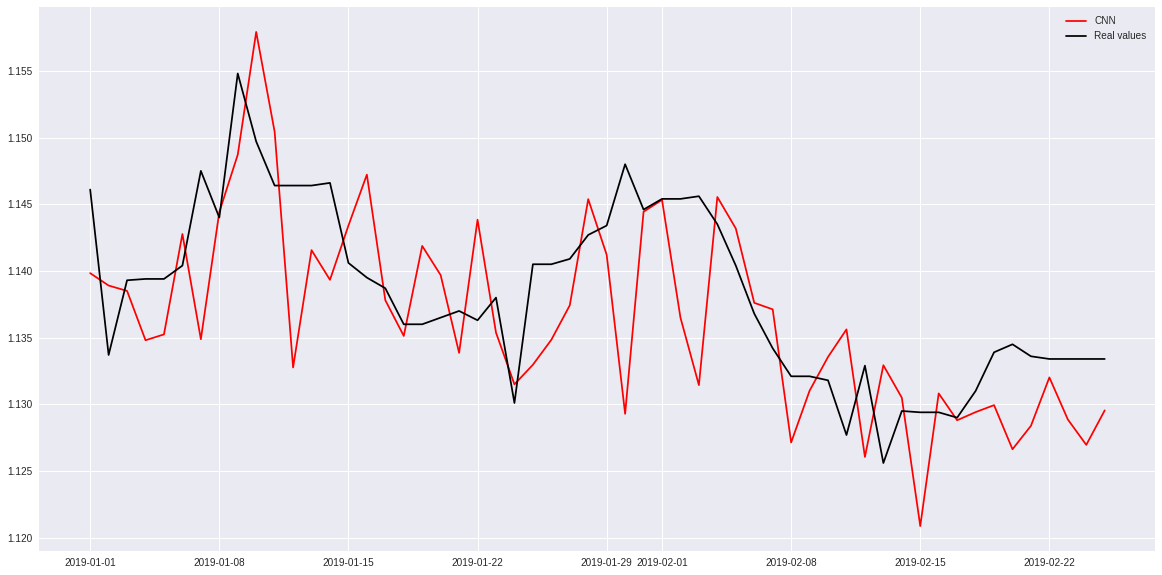

In [0]:
# CNN
preds_cnn = cnn_model.predict(np.expand_dims(X_test_norm, axis = 1))

plt.figure(figsize=(20,10))
plt.plot(dates_test, preds_cnn, label =  'CNN', color='red')
plt.plot(dates_test, y_test, label = 'Real values', color='black')
plt.legend()
plt.show()

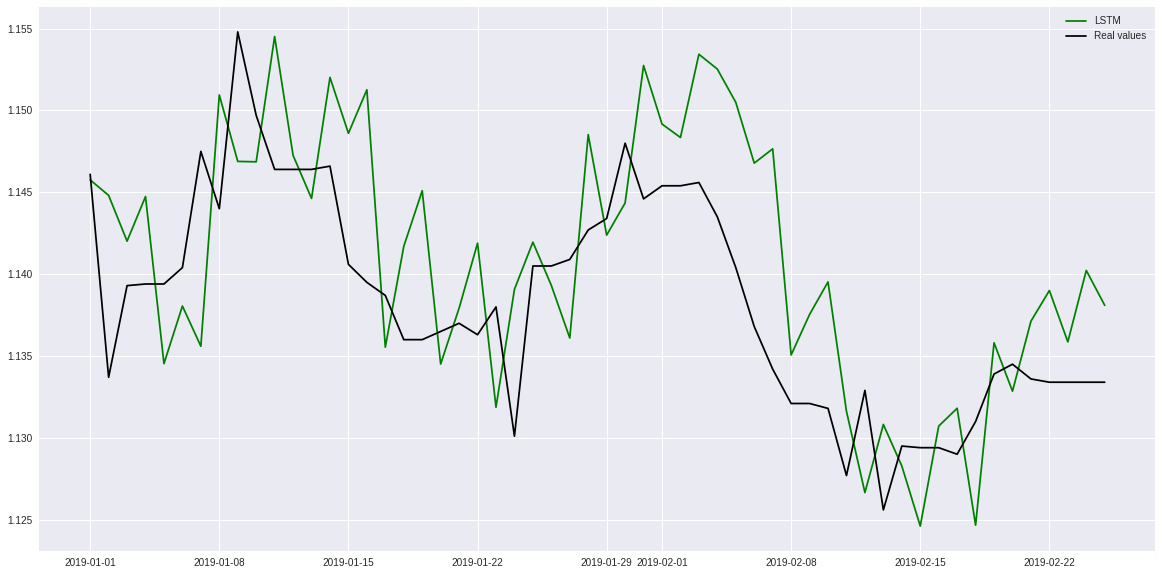

In [0]:
# LSTM
preds_lstm = lstm_model.predict(np.expand_dims(X_test_norm, axis = 1))

plt.figure(figsize=(20,10))
plt.plot(dates_test, preds_lstm, label = 'LSTM', color='green')
plt.plot(dates_test, y_test, label = 'Real values', color='black')
plt.legend()
plt.show()

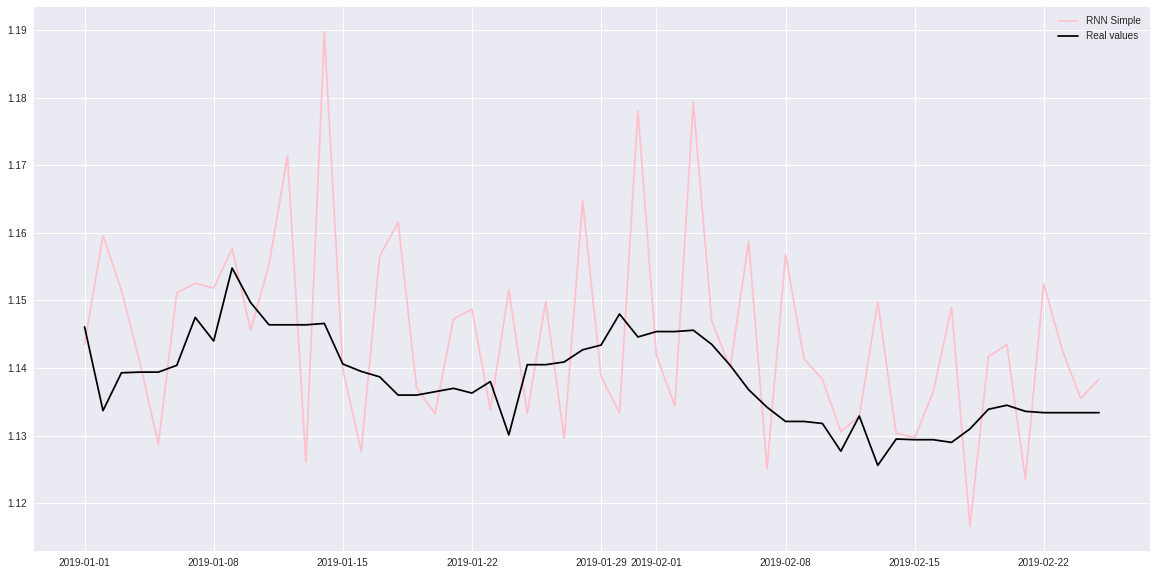

In [0]:
# RNN simple
preds_rnn = rnn_model.predict(np.expand_dims(X_test_norm, axis = 1))

plt.figure(figsize=(20,10))
plt.plot(dates_test, preds_rnn, label = 'RNN Simple', color='pink')
plt.plot(dates_test, y_test, label = 'Real values', color='black')
plt.legend()
plt.show()

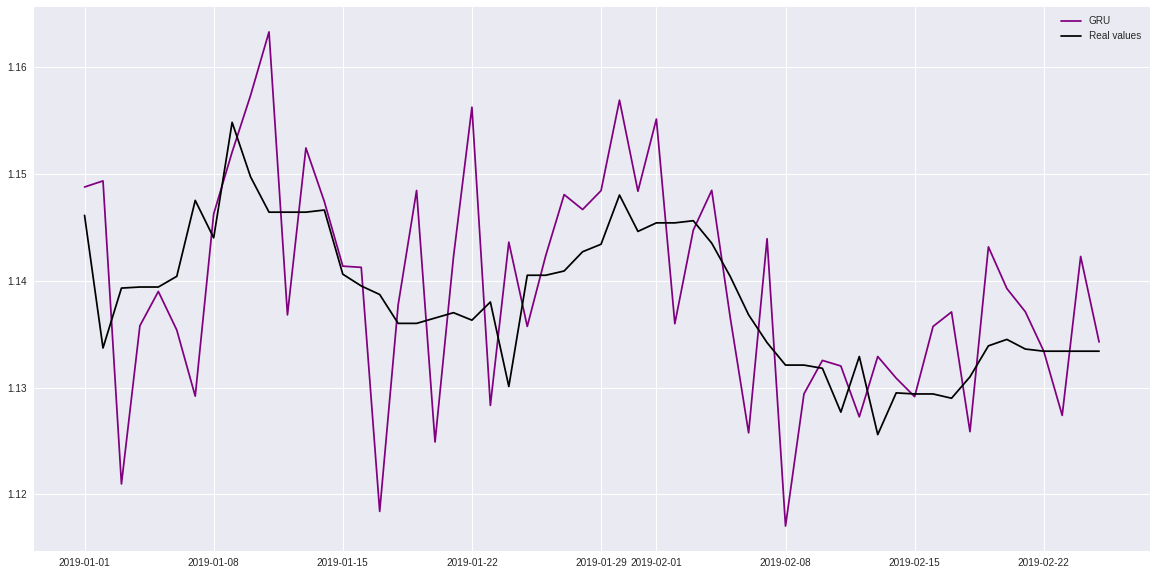

In [0]:
# GRU
preds_gru = gru_model.predict(np.expand_dims(X_test_norm, axis = 1))

plt.figure(figsize=(20,10))
plt.plot(dates_test, preds_gru, label = 'GRU', color='purple')
plt.plot(dates_test, y_test, label = 'Real values', color='black')
plt.legend()
plt.show()

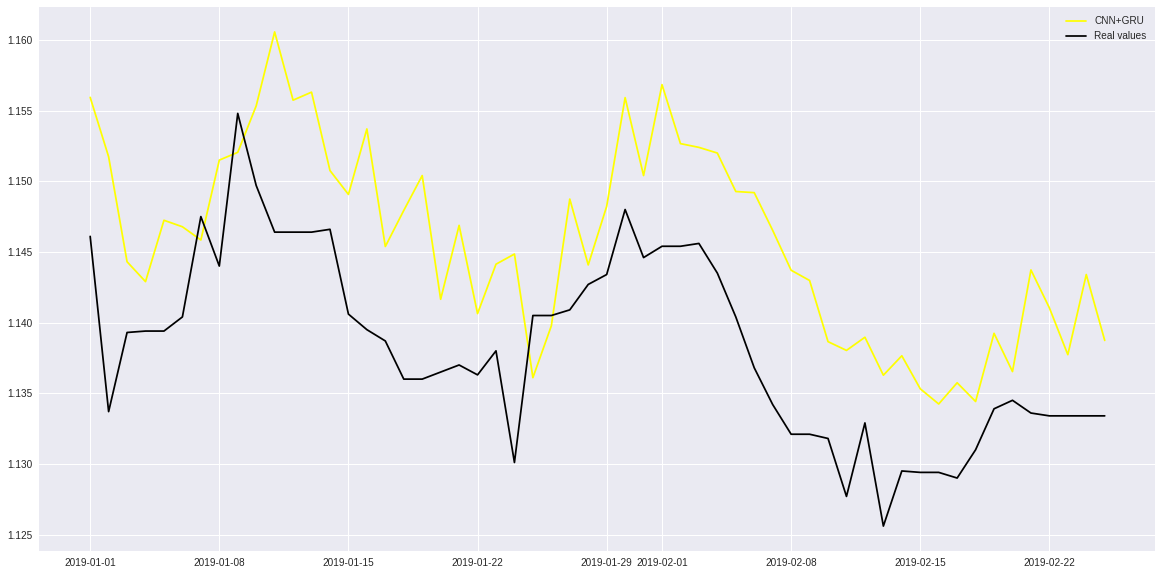

In [0]:
# CNN + GRU
preds_cnn_gru = cnn_gru_model.predict(np.expand_dims(X_test_norm, axis = 1))

plt.figure(figsize=(20,10))
plt.plot(dates_test, preds_cnn_gru, label = 'CNN+GRU', color='yellow')
plt.plot(dates_test, y_test, label = 'Real values', color='black')
plt.legend()
plt.show()

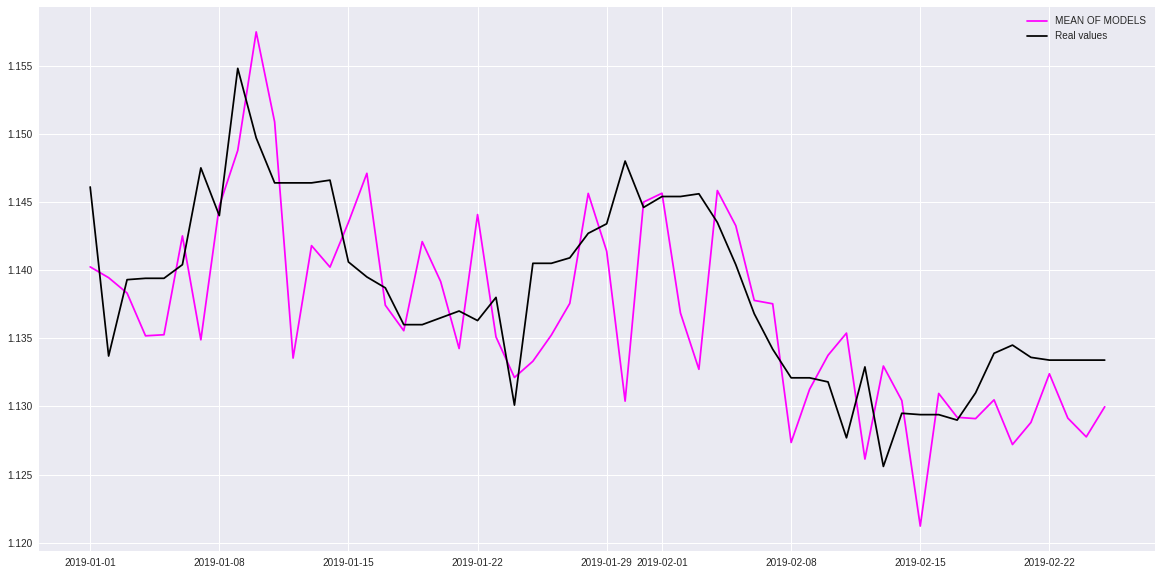

In [0]:
# Media de modelos

w_cnn=1/np.mean(history_cnn.history.get('val_loss'))
w_rnn=1/np.mean(history_rnn.history.get('val_loss'))
w_lstm=1/np.mean(history_lstm.history.get('val_loss'))
w_gru=1/np.mean(history_gru.history.get('val_loss'))
w_sum=w_cnn+w_rnn+w_lstm+w_gru

preds_mean=(w_cnn*preds_cnn+w_rnn*preds_rnn+w_lstm*preds_lstm+w_gru*preds_gru)/w_sum

plt.figure(figsize=(20,10))
plt.plot(dates_test, preds_mean, label = 'MEAN OF MODELS', color='magenta')
plt.plot(dates_test, y_test, label = 'Real values', color='black')
plt.legend()
plt.show()

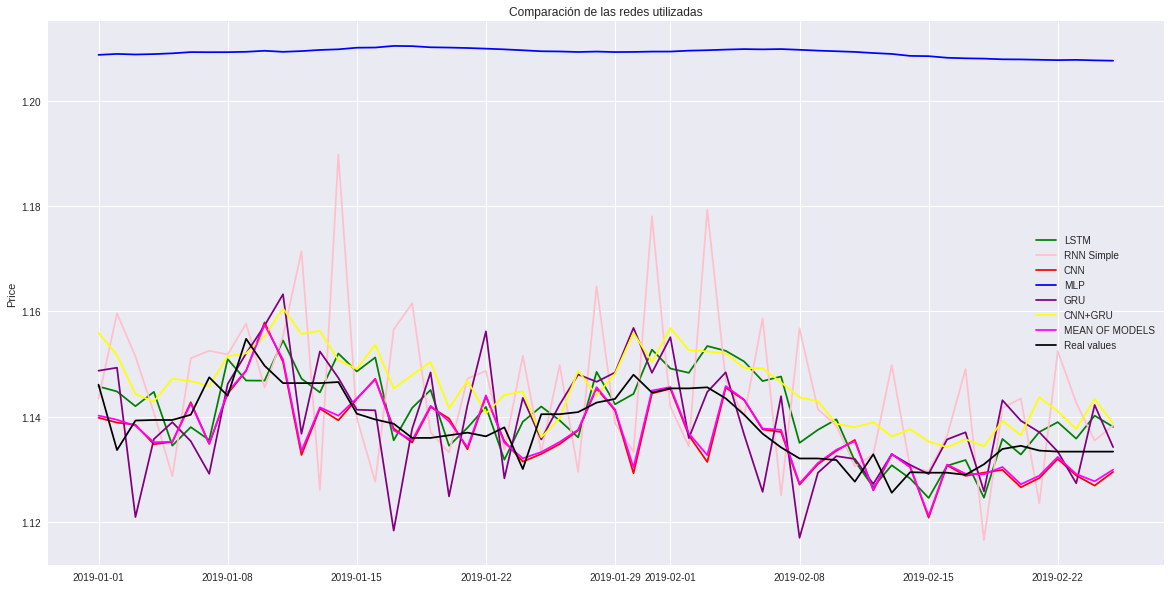

In [0]:
# Todos en uno

plt.figure(figsize=(20,10))
plt.plot(dates_test, preds_lstm, label = 'LSTM', color='green')
plt.plot(dates_test, preds_rnn, label = 'RNN Simple', color='pink')
plt.plot(dates_test, preds_cnn, label =  'CNN', color='red')
plt.plot(dates_test, preds_mlp, label =  'MLP', color='blue')
plt.plot(dates_test, preds_gru, label =  'GRU', color='purple')
plt.plot(dates_test, preds_cnn_gru, label =  'CNN+GRU', color='yellow')
plt.plot(dates_test, preds_mean, label = 'MEAN OF MODELS', color='magenta')
plt.plot(dates_test, y_test, label = 'Real values', color='black')
plt.title('Comparación de las redes utilizadas')
plt.ylabel('Price')
plt.legend()
plt.show()